Title:

Exploring Open Access Weather Radar with the Python ARM Toolkit


Description:

A number of organizations provide free and open access to data from their weather radars including the NEXRAD network operated by the National Weather Service, the Federal Aviation Administration’s Terminal Doppler Weather Radars as well as the scanning cloud and precipitation radars operated by the Atmospheric Radiation Measurement Climate Research Facility (ARM). This data contains a wealth of meteorological and dermatological information. However, until recently, tools to access this data through python were not readily available. The Python ARM Radar Toolkit (Py-ART) is an open source Python module which can read, visualize and analyze data from a number of these weather radars. This presentation will give an overview of how Py-ART can be used to explore and extract out meaningful scientific insights from these open access radar datasets.


Presenter(s):
 	Jonathan Helmus, Argonne National Laboratory
 	Scott Collis, Argonne National Laboratory


In [3]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12.0, 9.0]
import matplotlib.pyplot as plt
import numpy as np

import pyart

<center>
<h1 class="title">Exploring Open Access Weather Radar with the Python ARM Toolkit</h1>
<br/><br/><br/><br/>
<h2>Jonathan J. Helmus and Scott Collis</h2>
<br/><br/><br/><br/>
<div>
    <img class="logo" src="images/argonne_logo.png" height="100" width="250"/>
</div>

<div>
    <img class="logo" src="images/python-logo.png" height="100" width="250" align="left"/>
    <img class="logo" src="images/arm_logo.png" height="100" width="250" align="right"/>
</div>
<br/><br/>
<h3>SciPy 2015</h3>
<h3>July 10, 2015</h3>
</center>

## Introduction to Weather Radar

* Weather radar offer the ability to **probe large regions of the atmosphere** using electromagnetic pulses.

* Typically used to detect **precipitation** as well as track and anticipate **severe weather** and **tornadoes**.

* Other uses of weather radar include studies on **clouds** and **atmospheric systems** as well as providing long-term **climatological parameters**.

## The Python ARM Radar Toolkit (Py-ART)

<img src="images/pythocat.png" height=25% width=25% align="right"/>

* Py-ART is a package for working with **weather radar** data in Python.

* Provides the functionality you need when analyzing radar:

    * **Read** radar files.
    * **Visualize** radar moments.
    * **Correct** moments.
    * **Interpolate** onto a Cartesian grid.
  
* **Open source**, available on [GitHub](http://arm-doe.github.io/pyart/).



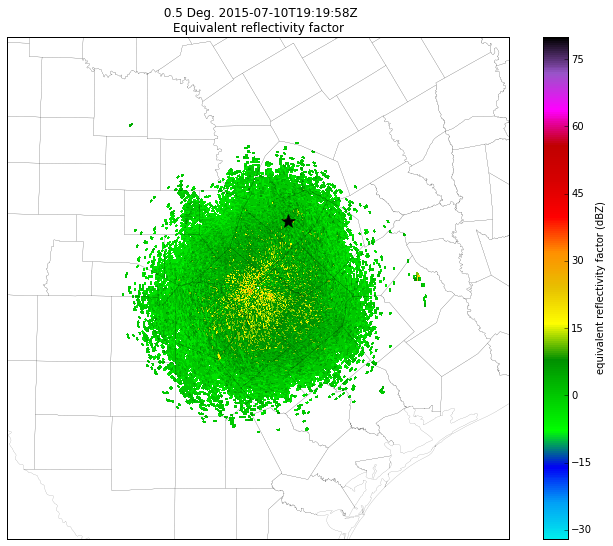

In [4]:
import urllib
handle = urllib.urlopen(
 'ftp://tgftp.nws.noaa.gov/SL.us008001/DF.of/'
 'DC.radar/DS.p19r0/SI.kewx/sn.last')

radar = pyart.io.read_nexrad_level3(handle)

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef',
    resolution='c', embelish=False)
display.basemap.drawcounties()
display.basemap.plot([-97.75], [30.25], 'k*', ms=15, latlon=True)

## NEXRAD (WSR-88D)

<img src="images/nexrad_coverage.jpg" height=30% width=30% align="right"/>

* NEXRAD is a network of S-band weather radars.

* Operated by the NSW, FAA and the Air Force.

* Each radar provides **5-10 minute** volumes

* Up to **460 km** radius.

* History
    * 1992-1997 deployment of network
    * 2008 upgrade to "super resolution"
    * 2010-2013 upgrade to polarimetric
    
<!-- * Raw NEXRAD data is provided freely to public in two formats, Level II and Level III.
-->
<!-- image source http://celebrating200years.noaa.gov/magazine/phased_array_radar/nexrad_650.jpg -->

## NEXRAD Level III

<img src="images/nexrad_650.jpg" height=15% width=15% align="right"/>

* Files contain a **single, reduced resolution sweep** of a **single radar moment** or product.

* **Post-processed** products such as accumulated rainfall and hydrometeor classification are also provided.

* *NIDS* formatted file which can provide data as radial images as well as other representation.  Py-ART only supports radial image files.

* These files are **small** (10's of kb). Excellent for visualization but not well suited for detailed analysis.


## Availability of NEXRAD Level III data

* Near-real time and data from the last 24 hours is provided by the NWS through an anonymous FTP site: [ftp://tgftp.nws.noaa.gov](ftp://tgftp.nws.noaa.gov).

* Historical data can be ordered from [NOAA's National Centers for Environmental Information (NCEI)](http://www.ncdc.noaa.gov/), formerly the NCDC.  
    * Dates and location are selected through a web form.  
    * Within 5-25 minutes an email is sent to the specified address with a link to a HTTP and FTP site where the data can be downloaded.

In [5]:
import pyart 
radar = pyart.io.read('sample_files/KLOT_SDUS53_N0QLOT_201506151541')

In [6]:
radar.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	units: meters
	long_name: Altitude
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (360,)>
	comment: Azimuth of antenna relative to true north
	long_name: azimuth_angle_from_true_north
	standard_name: beam_azimuth_angle
	units: degrees
	axis: radial_azimuth_coordinate
elevation:
	data: <ndarray of type: float32 and shape: (360,)>
	comment: Elevation of antenna relative to the horizontal plane
	long_name: elevation_angle_from_horizontal_plane
	standard_name: beam_elevation_angle
	units: degrees
	axis: radial_elevation_coordinate
fields:
	reflectivity:
		data: <ndarray of type: float32 and shape: (360, 460)>
		_FillValue: -9999.0
		coordinates: elevation azimuth range
		long_name: Reflectivity
		standard_name: equivalent_reflectivity_factor
		units: dBZ
fixed_angle:
	data: <ndarray of type: float32 and shape: (1,)>
	units: degrees
	long_name

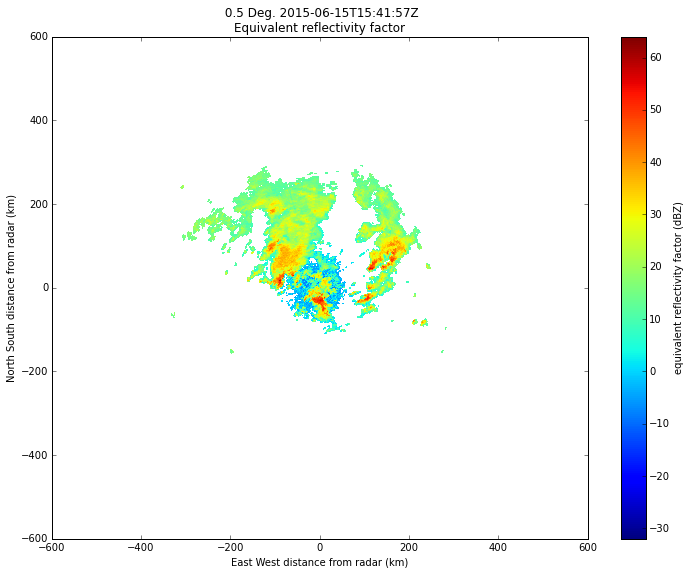

In [7]:
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-32, vmax=64)

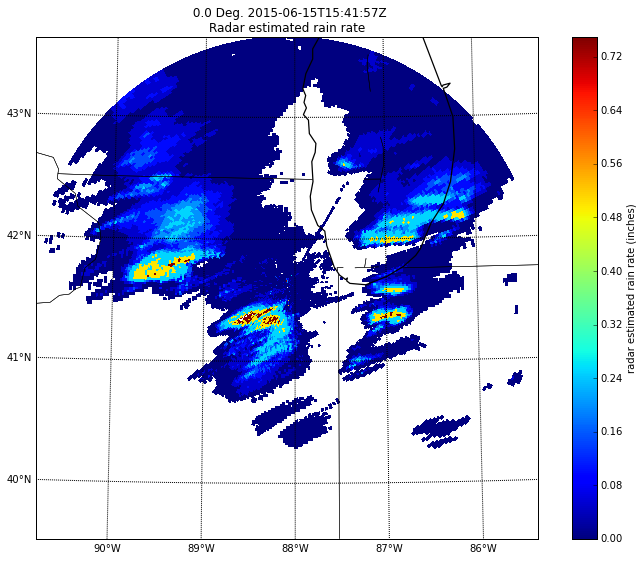

In [8]:
radar = pyart.io.read('sample_files/KLOT_SDUS33_N1PLOT_201506151541')
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('radar_estimated_rain_rate', vmin=0, vmax=0.75, 
                     resolution='i')

## NEXRAD Level II

* Level II files contain **all moments** in **full resolution** from a **complete volume** consisting of 9-20 sweeps.

* Provides a **three-dimensional** view of the atmosphere.

* These are the base radar moments with little or **no correction** or quality control.

* **Larger** files, ~5-25 MB.  Good for **detailed analysis**.

## Availability of NEXRAD Level II data

* Several universities and research organization make Level II data from the past few hours to days available.

    * [Iowa State Mesonet](http://mesonet-nexrad.agron.iastate.edu/level2/raw/)
    * [NCEP NOMADS](http://nomads.ncep.noaa.gov/pub/data/nccf/radar/nexrad_level2/)
    * [Unidata THREDDS Data Server](http://motherlode.ucar.edu/thredds/catalog/nexrad/level2/catalog.html)


* Historical data can be ordered from [NOAA's National Centers for Environmental Information (NCEI)](http://www.ncdc.noaa.gov/), formerly the NCDC.  
    * Dates/location are selected on a web form.  
    * Within 5-25 minutes an email is sent with a link to a HTTP and FTP site.

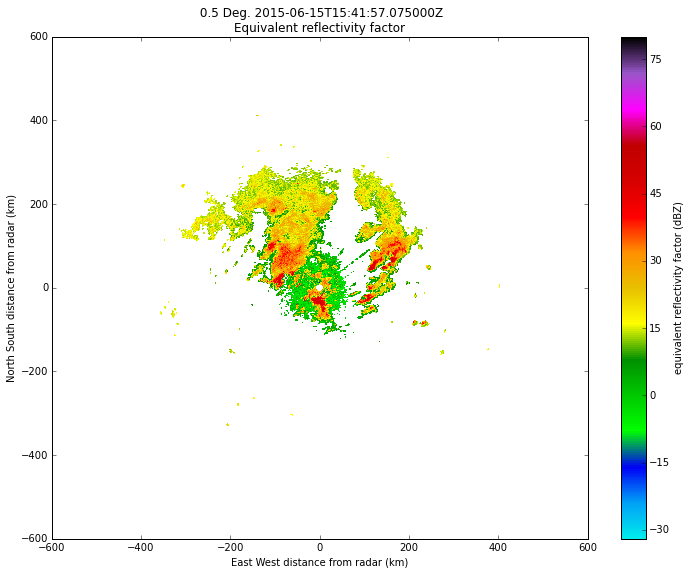

In [9]:
radar = pyart.io.read('sample_files/KLOT20150615_154157_V06.gz')
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef')

In [10]:
radar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (9720,)>
elevation: <ndarray of type: float32 and shape: (9720,)>
fields:
	differential_phase: <ndarray of type: float32 and shape: (9720, 1832)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (9720, 1832)>
	spectrum_width: <ndarray of type: float32 and shape: (9720, 1832)>
	reflectivity: <ndarray of type: float32 and shape: (9720, 1832)>
	differential_reflectivity: <ndarray of type: float32 and shape: (9720, 1832)>
	velocity: <ndarray of type: float32 and shape: (9720, 1832)>
fixed_angle: <ndarray of type: float32 and shape: (19,)>
instrument_parameters:
	unambiguous_range: <ndarray of type: float32 and shape: (9720,)>
	nyquist_velocity: <ndarray of type: float32 and shape: (9720,)>
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 19
ngates: 1832
nrays: 9720
rada

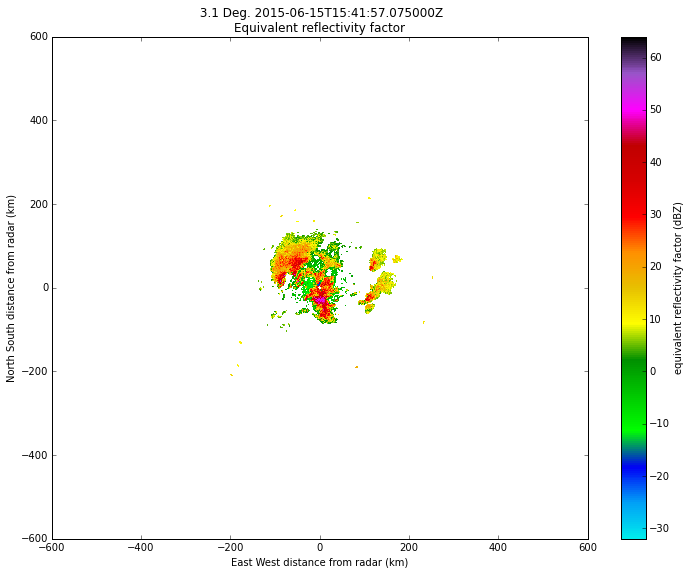

In [11]:
display.plot('reflectivity', sweep=8, vmin=-32, vmax=64, 
             cmap='pyart_NWSRef') 

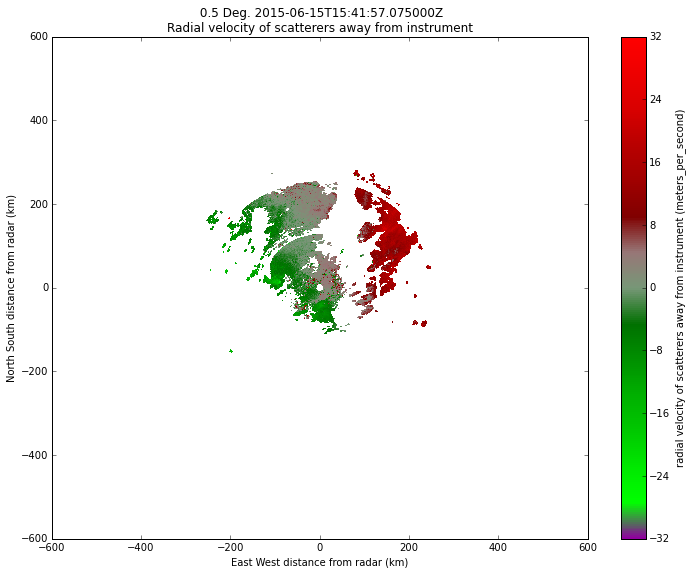

In [12]:
display.plot('velocity', sweep=1, vmin=-32, vmax=32, 
             cmap='pyart_NWSVel')

## Terminal Doppler Weather Radar (TDWR)
<img src="images/TDWR.png" alt="TDWR Map" align="right" height=50% width=50%>

* C-band radars located near **major airports** in the United States.
<!-- 45 instruments -->

* **Higher range resolution** than NEXRAD but with **limited range**.
<!-- 150 m vs 250 m, range 130 km -->

* Coverage in the US is **sporatic**.

* Level III data is available available near real-time from the [NWS's anonymous FTP site](ftp://tgftp.nws.noaa.gov/) or historically from [NCEI](http://www.ncdc.noaa.gov/).

<!---
["Map TDWR" by Pierre cb done using File:Carte des villes américaines.svg as Background, data from Lincoln Laboratory and Weather Underground - Own work. Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Map_TDWR.svg#/media/File:Map_TDWR.svg]
-->

In [ ]:
# This takes a few minutes to execute, do NOT run it in the presentation 
import glob
import matplotlib.pyplot as plt
from matplotlib import animation

files = sorted(glob.glob('tdwr_files/TR1/*'))

def animate(nframe):
    plt.clf()
    radar = pyart.io.read(files[nframe])
    display = pyart.graph.RadarDisplay(radar)
    display.plot('reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef',
                 title=display.time_begin.isoformat(), axislabels_flag=False)

fig = plt.figure(figsize=(10,8))
anim = animation.FuncAnimation(fig, animate, frames=len(f iles))
anim.save('tdwr_animation.gif', writer='imagemagick', fps=20)

<center>
![Animation of OHare TDRW](https://github.com/jjhelmus/scipy2015_talk/raw/master/tdwr_animation.gif)

</center>

<!-- <center>
![Animation of OHare TDRW](tdwr_animation.gif)
</center>
-->

## The ARM Climate Research Facility
<br></br>
<center>
<img src="images/arm_logo.png" height=30% width=30% align="center"/>
</center>
<br></br>

* ARM is a DOE program which provides *in situ* and remote sensing observatories.

* Mission to improve the understanding and modeling of **climate** and **earth system models**.  

* All data from ARM's instruments available to the public **free of charge**.  

* Operates a **number** of scanning weather radars.


## ARM Scanning Radars

<img src="images/sgp_xsapr.jpg" height=40% width=40% align="right"/>

* Target precipitation (SA**P**Rs) 
    * X-band (XSAPR)
    * C-band (CSAPR)
<br></br><br></br>

* Target clouds (SA**C**Rs).  
    * Dual wavelength.
    * Ka/W-band.
    * Ka/X-band.

## Availability of data from ARM scanning radars

<img src="images/sacr2.jpg" height=40% width=40% align="right"/>

* Data available at the [**ARM Data Archive**](http://www.archive.arm.gov/armlogin/login.jsp).

* Register and order data through a web interface.  

* Data staged to a **FTP** site.

* **NetCDF** files provided which follow the [Cf/Radial convention.](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/cfradial.html)

* The [arm_archive module](https://github.com/jjhelmus/arm_archive) provides a Python and CLI interface.  


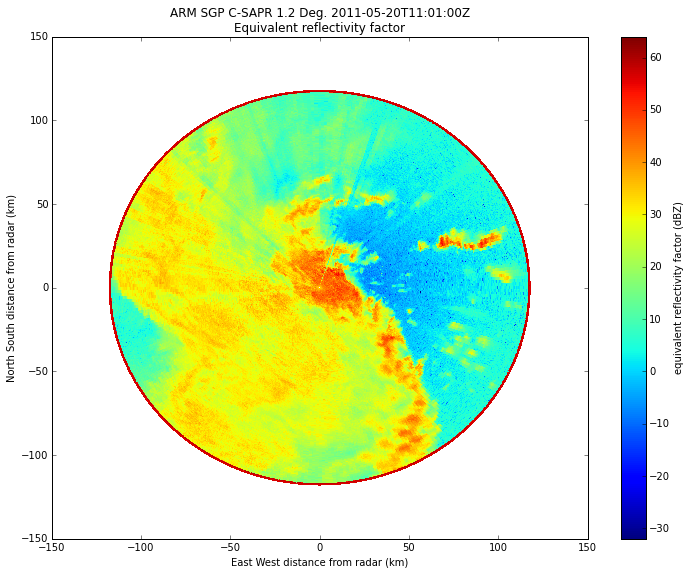

In [13]:
radar = pyart.io.read('sample_files/110635.mdv')
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', sweep=1, vmin=-32,  vmax=64)

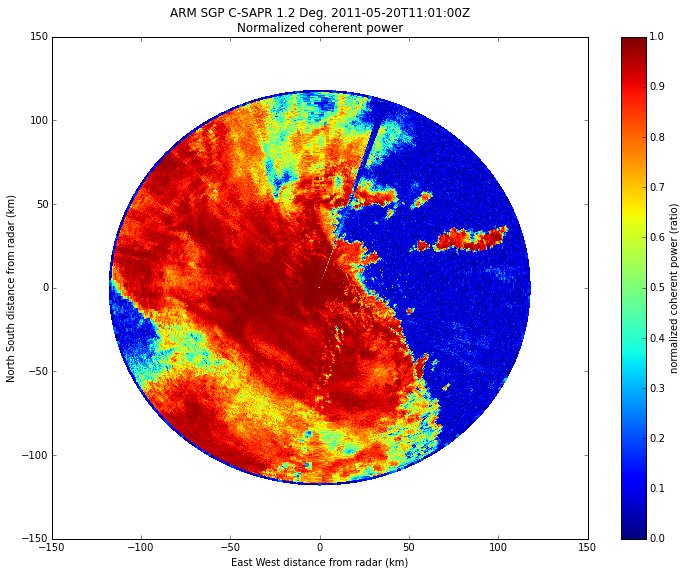

In [14]:
display.plot('normalized_coherent_power', sweep=1, vmin=0, vmax=1)

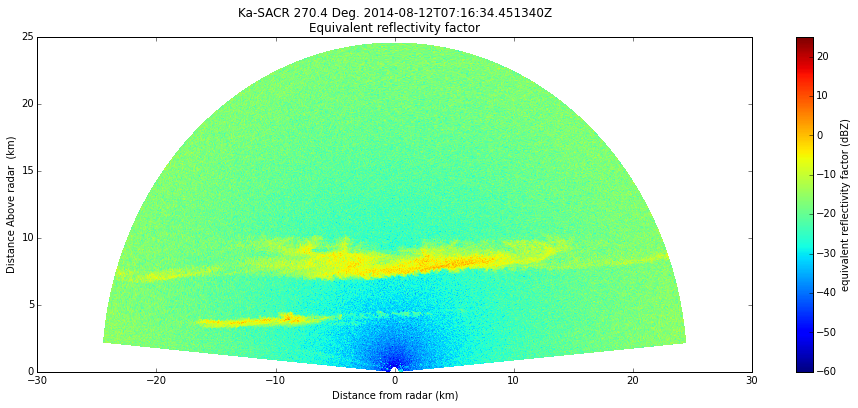

In [15]:
radar = pyart.io.read('sample_files/tmpkasacrawrhiM1.a1.20140812.071634.nc', 
                      delay_field_loading=True)
fig = plt.figure(figsize=(16, 6))
display = pyart.graph.RadarDisplay(radar)
display.plot('reflectivity', vmin=-60, vmax=25)

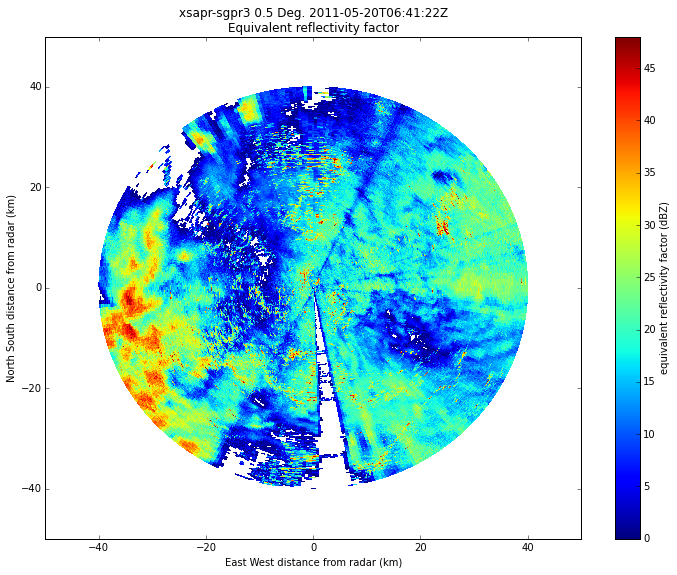

In [16]:
radar1 = pyart.io.read('sample_files/XSE110520064117.RAW7HE4')
display = pyart.graph.RadarDisplay(radar1) 
display.plot('reflectivity', vmin=0, vmax=48) 

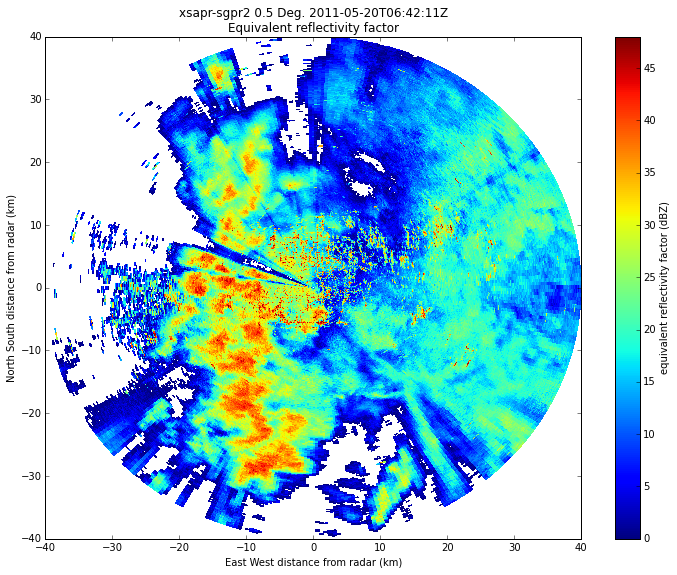

In [17]:
radar2 = pyart.io.read('sample_files/XSW110520064208.RAW7HE5')
display = pyart.graph.RadarDisplay(radar2)
display.plot('reflectivity', vmin=0, vmax=48)


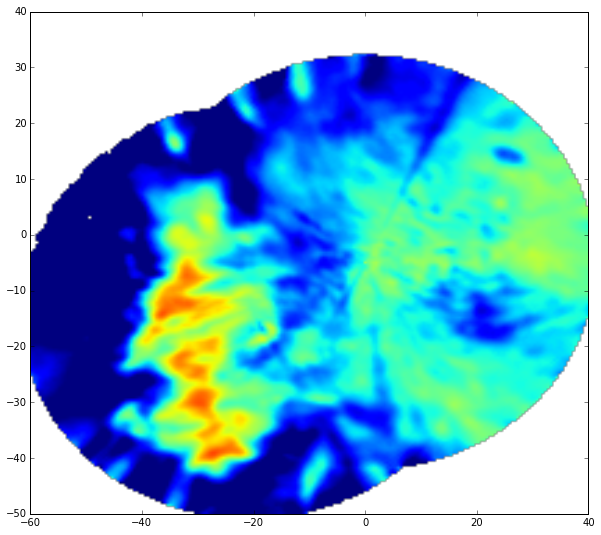

In [18]:
grid = pyart.map.grid_from_radars(
    (radar1, radar2), gridding_algo='map_gates_to_grid',
    grid_shape=(1, 201, 201),
    grid_limits=((1000, 1000), (-50000.0, 50000.0), (-60000.0, 40000.0)),
    grid_origin = (36.57861, -97.363611),
    fields=['reflectivity'],
    refl_field='reflectivity',
    max_refl=100.)
plt.imshow(grid.fields['reflectivity']['data'][0], origin='lower',
           extent=(-60, 40, -50, 40), vmin=0, vmax=48)

## Acknowledgements and related packages


**Contributors to Py-ART**

Anderson Gama, Kirk North, Joe Hardin, Steve Nesbitt, and others

**Additional open source weather radar software**

* [ArtView](https://github.com/nguy/artview) : Nick Guy
* [PyTDA, MMM-Py, DualPol](https://github.com/tjlang?tab=repositories) : Tim Lang
* [wradlib](http://wradlib.bitbucket.org/)
* [TRMM RSL](http://trmm-fc.gsfc.nasa.gov/trmm_gv/software/rsl/)
* [BALTRAD](http://baltrad.eu/)
 
<table width="80%" align='center'>
  <tr>
    <td>
    <font size="2">
This presentation has been created by UChicago Argonne, LLC, Operator of Argonne National Laboratory (“Argonne”). Argonne, a U.S. Department of Energy Office of Science laboratory, is operated under Contract No. DE-AC02-06CH11357. This research was supported by the Office of Biological and Environmental Research of the U.S. Department of Energy as part of the Atmospheric Radiation Measurement Climate Research Facility. 
    </font>
    </td>
  </tr>
</table>



<center>
![Animation of KEWX NEXRAD radar](https://github.com/jjhelmus/scipy2015_talk/raw/master/kewx_animation.gif)
Slides available at  [github.com/jjhelmus/scipy2015_talk](http://github.com/jjhelmus/scipy2015_talk])

<!-- <center>
![Animation of KEWX NEXRAD radar](kewx_animation.gif)
Slides available at  [github.com/jjhelmus/scipy2015_talk](http://github.com/jjhelmus/scipy2015_talk])
</center>
-->
<!-- http://🍕💩.ws/🍈🐮😉🍎🌂🍕 or -->